In [1]:
import requests
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib

In [2]:
# encode the query using a library

columns = [
    "MagnetometerUncalibrated_x",
    "MagnetometerUncalibrated_y",
    "MagnetometerUncalibrated_z",
    "Magnetometer_x",
    "Magnetometer_y",
    "Magnetometer_z"
]
query = "SELECT " + (", ".join([f"COUNT({column}) as {column}" for column in columns])) + " FROM prod"

response = requests.get(f"http://docker.caracal-lime.ts.net:9000/exp?query={urllib.parse.quote(query)}")
pd.read_csv(io.StringIO(response.text)).T

,0
MagnetometerUncalibrated_x,4304768
MagnetometerUncalibrated_y,4304768
MagnetometerUncalibrated_z,4304768
Magnetometer_x,4311729
Magnetometer_y,4311729
Magnetometer_z,4311729


Es haben alle Spalten Daten, von den Unkalibrierten gibt es aber ein paar weniger.

In [3]:
def get_df(person = None, activity = None):
    where_clause = "WHERE Magnetometer_x IS NOT NULL"
    if person is not None:
        where_clause += f" AND person = '{person}'"
    if activity is not None:
        where_clause += f" AND activity = '{activity}'"
    r = requests.get(f"http://docker.caracal-lime.ts.net:9000/exp?query=SELECT timestamp, MagnetometerUncalibrated_x, MagnetometerUncalibrated_y, MagnetometerUncalibrated_z, Magnetometer_x, Magnetometer_y, Magnetometer_z, filename, person, activity, hash FROM prod {where_clause}")
    pData = pd.read_csv(io.StringIO(r.text), parse_dates=['timestamp'])
    return pData.set_index('timestamp', drop=True)

In [4]:
df = get_df()

In [5]:
df.sample(5)

,MagnetometerUncalibrated_x,MagnetometerUncalibrated_y,MagnetometerUncalibrated_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,filename,person,activity,hash
timestamp,,,,,,,,,,
2023-03-15 16:44:41.710000+00:00,-107.587502,-232.818756,-727.968750,44.643753,18.525002,-4.856250,08_SamsungA22-2023-03-15_16-37-41,Ben_Tran,Rennen,59921473c626497d86c430b4e9749aa4
2023-03-16 21:53:26.280000+00:00,-101.145203,-5.704437,-105.764893,-6.227455,-15.459514,-47.691483,02_iPhone13ProMax-2023-03-16_21-43-10,Gabriel_Torres,Sitzen,2c739c059b9f4632966a704e6970905e
2023-03-02 06:59:33.680000+00:00,-110.812508,-165.975006,-683.512512,14.512501,35.212502,-28.012501,11-SamsungA22-2023-03-02_06-53-59,Ben_Tran,Velofahren,1a001aa6a09a471281f5bdb1ac70ded7
2023-02-25 14:19:53.960000+00:00,-185.483994,103.080811,-328.697845,-19.328491,30.381340,32.875885,01_iPhone14-2023-02-25-2023-02-25_14-17-47,Ognjen_Colovic,Laufen,fc4955e4028d4e568ea29e35f8dfbeb9
2023-03-16 13:41:30.720000+00:00,-12.920074,206.800278,-146.227158,-1.916136,35.973343,-22.938766,03_iPhone12-2023-03-16_13-41-17,Manjavy_Kirupa,Velofahren,80dc8e2120314918bb5d58e971982519


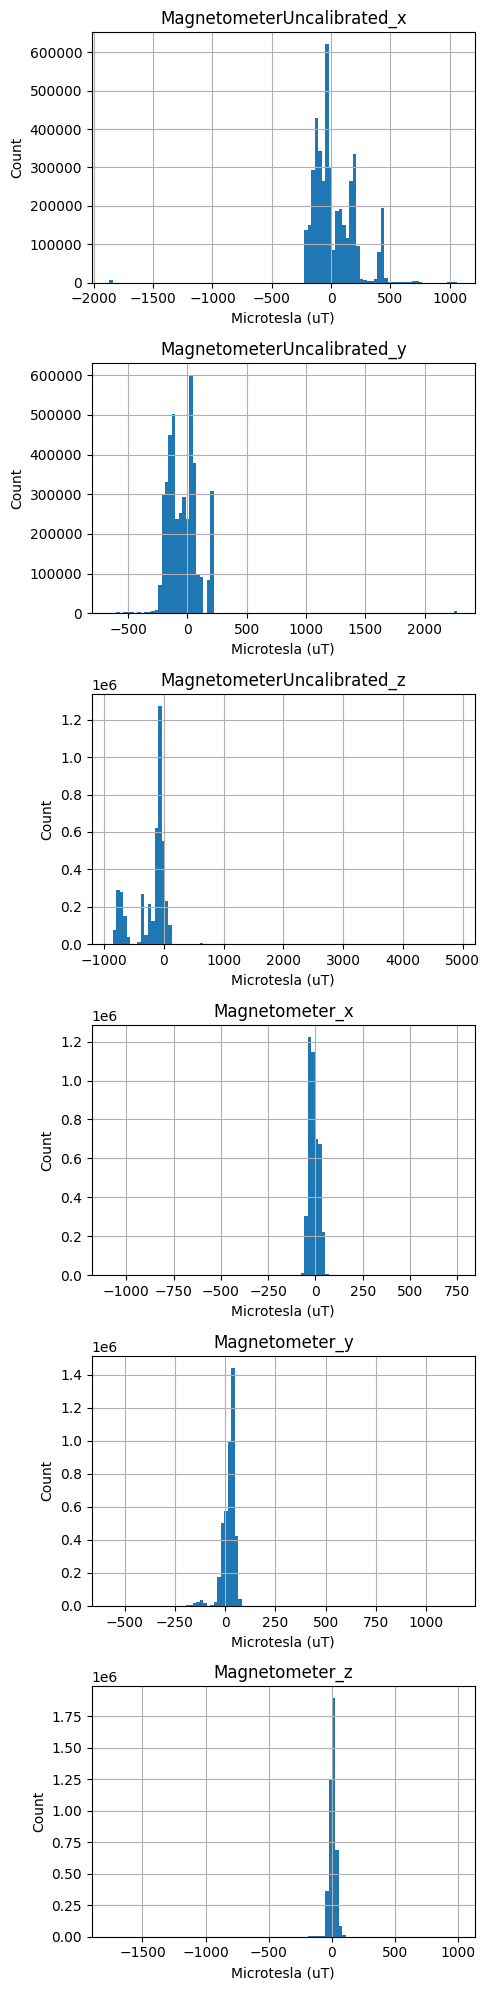

In [10]:
# plot distribution of pressure and relative altitude
# make figure bigger and create 2 subplots
fig, axs = plt.subplots(6, 1, figsize=(5, 20))
df.hist(column=columns, bins=100, ax=axs)
for ax in axs:
    ax.set_xlabel("Microtesla (uT)")
    ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

Masseinheit ist in Mikrotesla (uT).

In den Grafiken ist zu sehen, dass die unkalibrierten Daten viel mehr Ausreisser (Cluster die nicht in die Hauptgruppe passen) haben. Deshalb macht es sehr wahrscheinlich Sinn die kalibrierten Daten zu verwenden.

In [8]:
# get unique values each activity and person
activities = df['activity'].unique()
people = df['person'].unique()

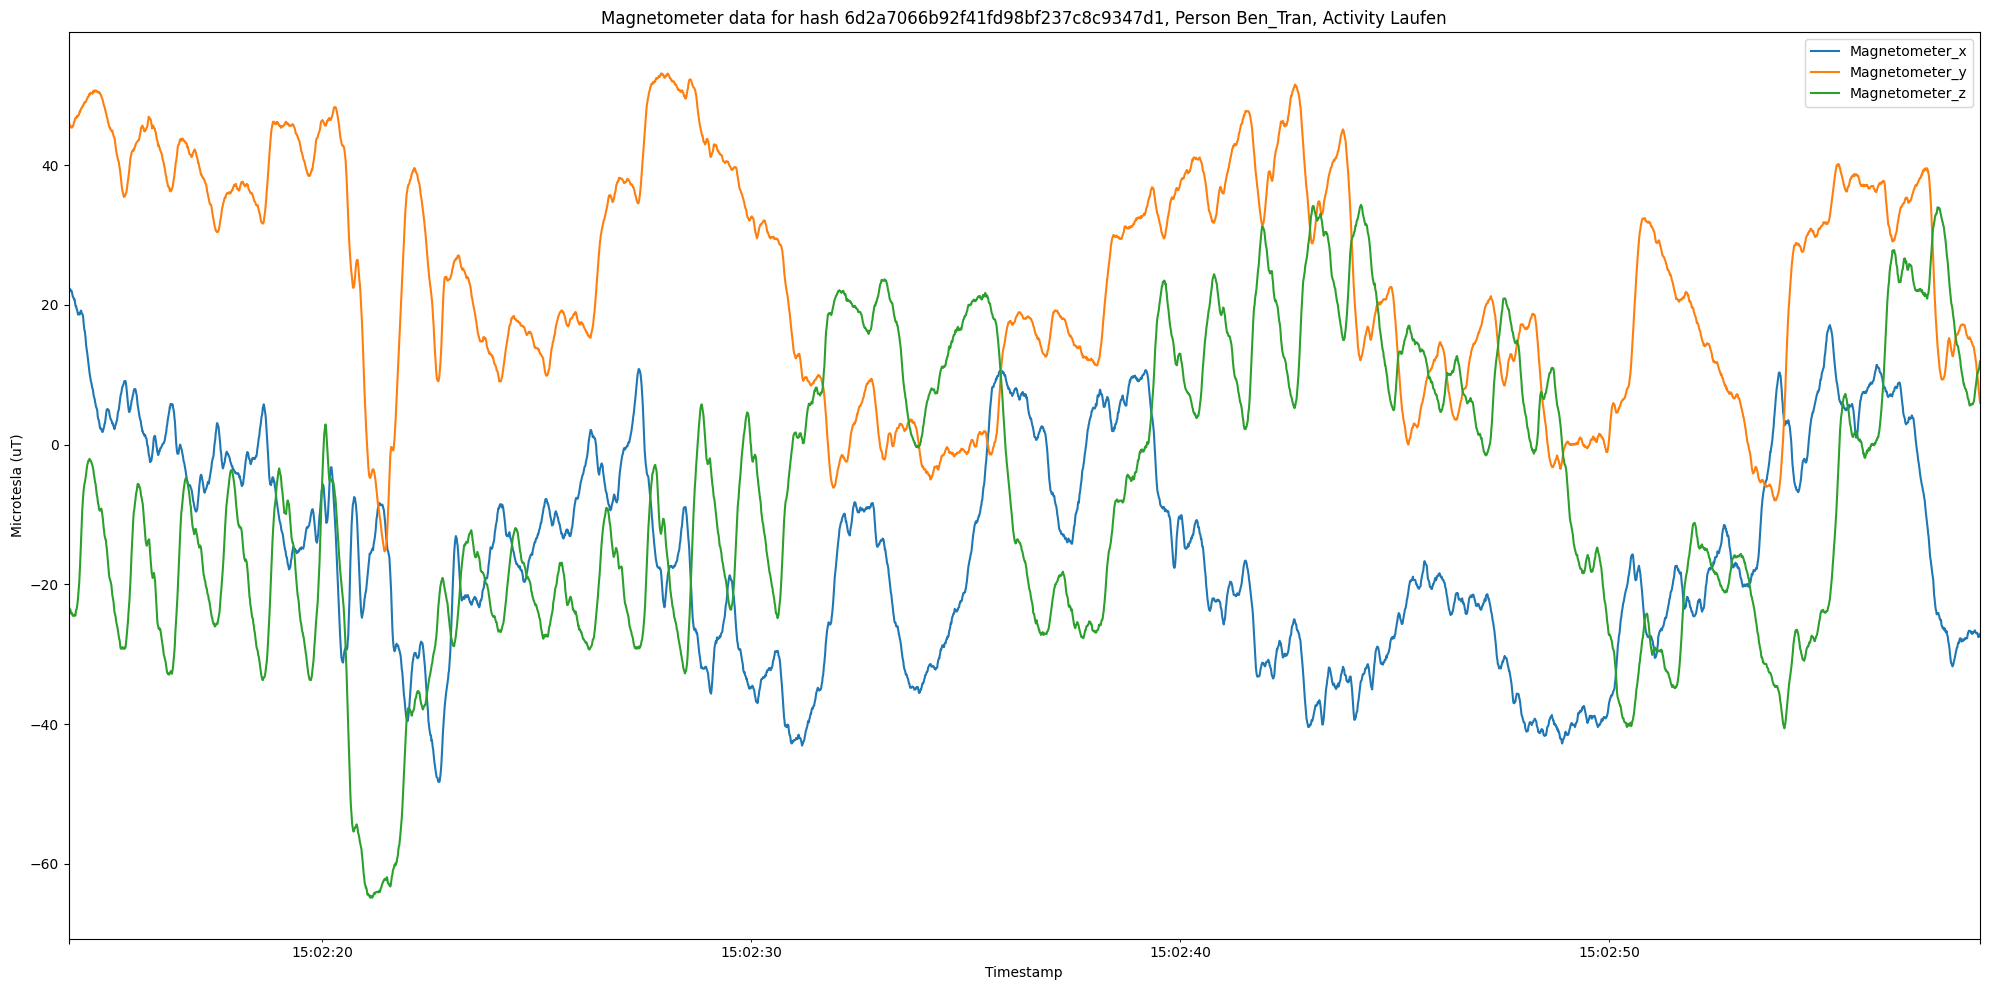

In [11]:
# visualize the data of the first hash
hash = df['hash'].unique()[0]
df[df['hash'] == hash].plot(y=["Magnetometer_x", "Magnetometer_y", "Magnetometer_z"], figsize=(20, 10))
plt.xlabel("Timestamp")
plt.ylabel("Microtesla (uT)")
plt.title(f"Magnetometer data for hash {hash}, Person {df[df['hash'] == hash]['person'].unique()[0]}, Activity {df[df['hash'] == hash]['activity'].unique()[0]}")
plt.tight_layout()
plt.show()

In dieser Grafik ist ersichtlich, dass es periodische Muster in den Daten gibt, die von einem Machine Learning Algorithmus erkannt werden können.

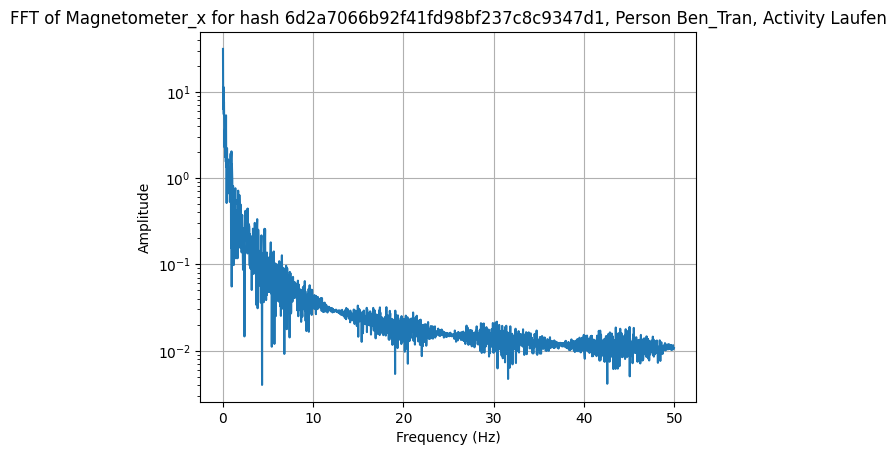

In [13]:
from scipy.fft import fft, fftfreq

# first hash
hash = df['hash'].unique()[0]
df_hash = df[df['hash'] == hash]

x = df_hash['Magnetometer_x'].values

# sample spacing
T = 1.0 / 100.0
yf = fft(x)
xf = fftfreq(x.size, T)[:x.size//2]

plt.plot(xf, 2.0/x.size * np.abs(yf[0:x.size//2]))
plt.yscale('log')
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title(f"FFT of Magnetometer_x for hash {hash}, Person {df[df['hash'] == hash]['person'].unique()[0]}, Activity {df[df['hash'] == hash]['activity'].unique()[0]}")
plt.show()

Hier ist ersichtlich dass tiefe Frequenzen eine grosse Amplitude haben. Auffällig ist desweitere, dass die Amplituden stark Schwanken bei ähnlichen Frequenzen. Ausser bei den Frequenzen 25 Hz, 12.5 Hz und 37.5Hz. Um diese Frequenzen sind die Amplituden sehr konstant.

In [14]:
# create individual dataframes for each hash
dfs_by_hash = {}
frequencies = {}
for hash in df['hash'].unique():
    dfs_by_hash[hash] = df[df['hash'] == hash]
    frequencies[hash] = dfs_by_hash[hash].index.to_series().diff().value_counts().sort_index()

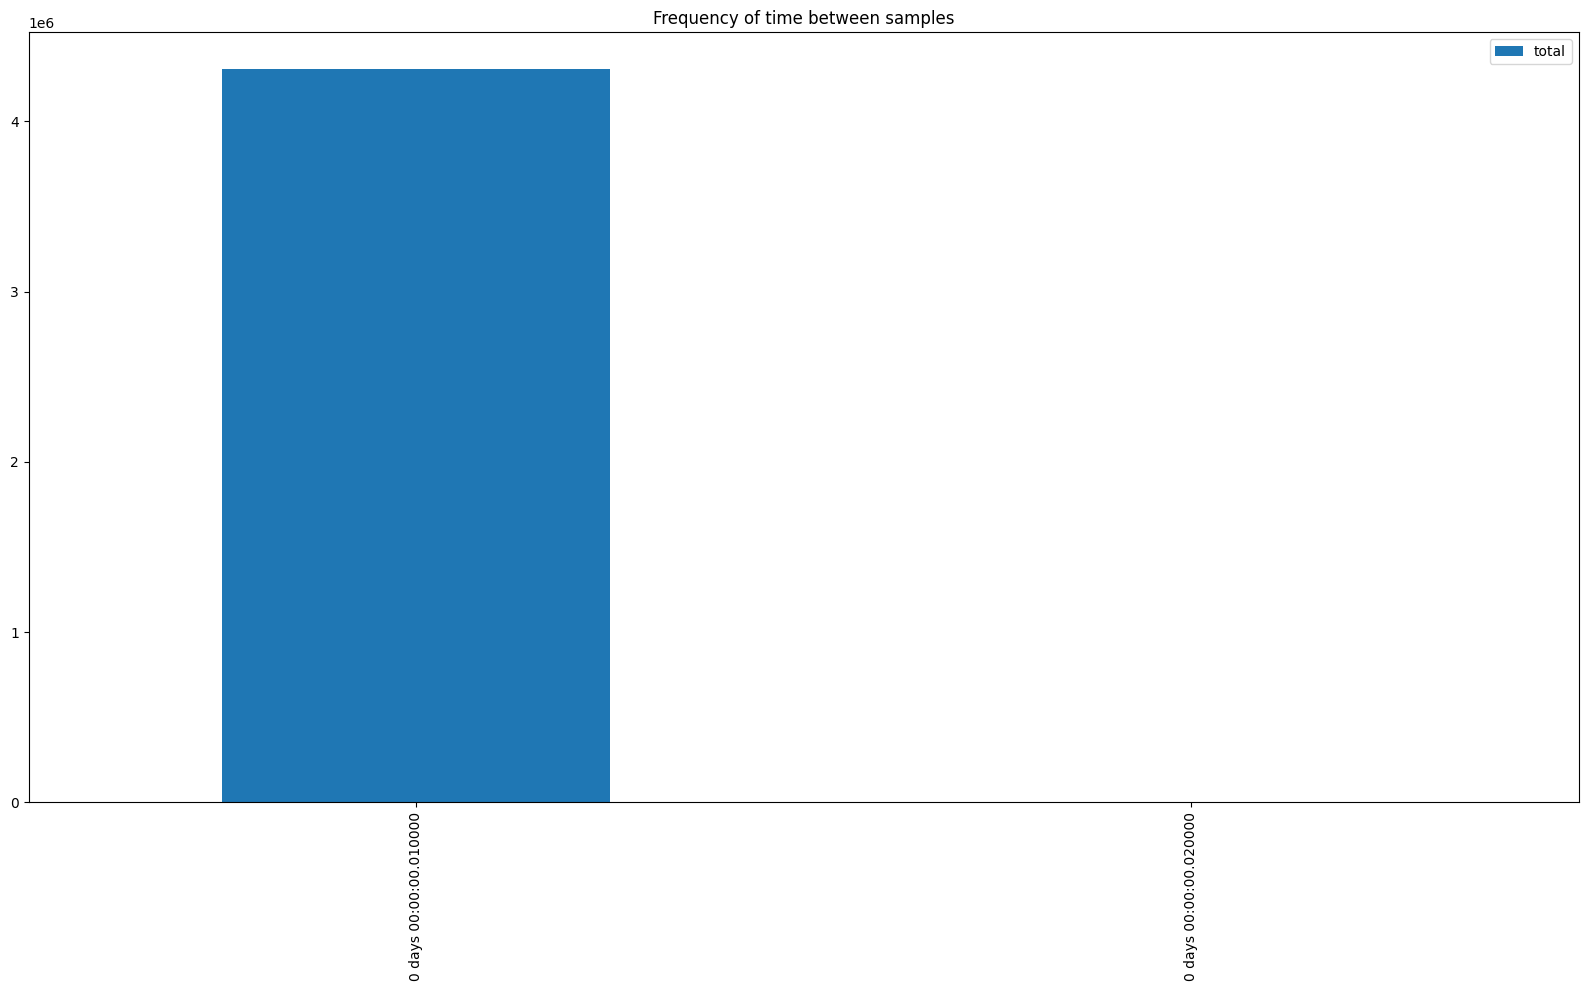

In [15]:
# combine all frequencies into one dataframe
frequencies_df = pd.DataFrame(frequencies).fillna(0).astype(int)
# summ all hash columns
frequencies_df['total'] = frequencies_df.sum(axis=1)
# drop hash columns
frequencies_df = frequencies_df.drop(columns=frequencies_df.columns[:-1])
# sort by total
frequencies_df = frequencies_df.sort_values(by=['total'], ascending=False)
# filter out rows with less than 0.1% of the total
frequencies_df = frequencies_df[frequencies_df['total'] > frequencies_df['total'].sum() * 0.0001]
# plot
frequencies_df.plot.bar(figsize=(20, 10), title="Frequency of time between samples")
plt.show()

(Fast) alle Messungen haben eine Samplingfrequency von 100Hz.